<a href="https://colab.research.google.com/github/Aqfa07/ML-Project/blob/main/Project%206%3A%20Batch%20Normalization%20Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

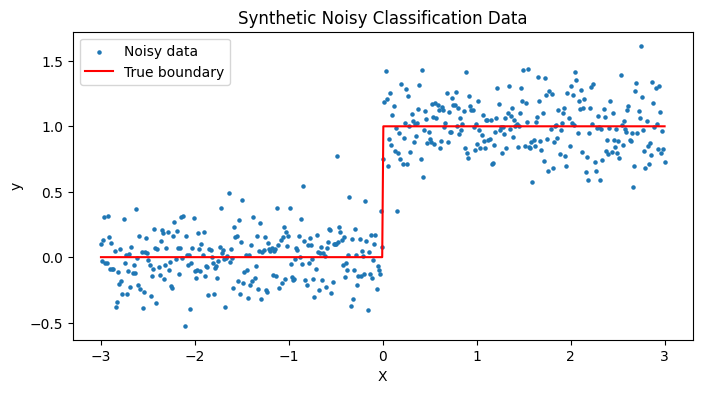

Training model WITHOUT BatchNorm...

Training model WITH BatchNorm...


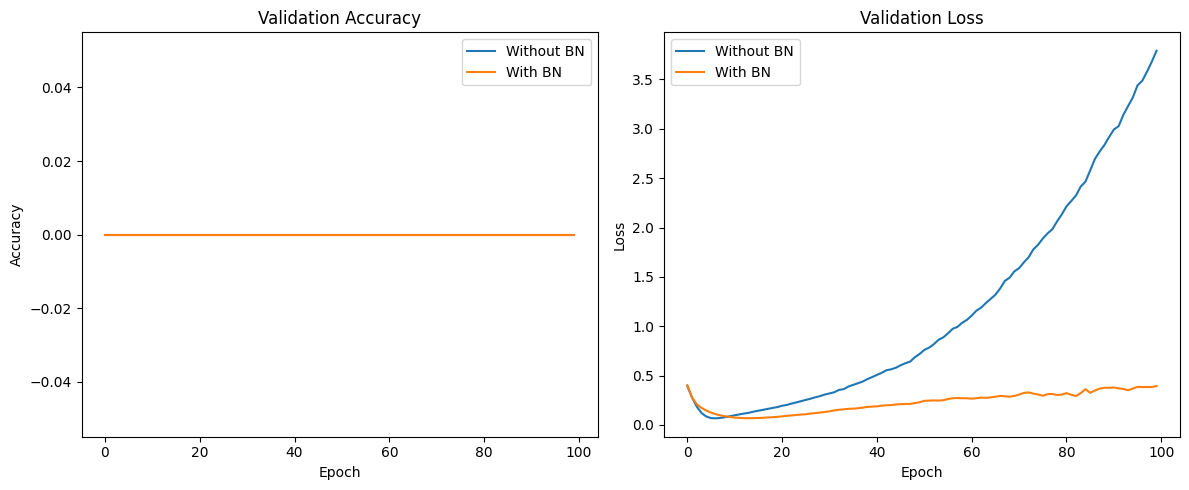

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


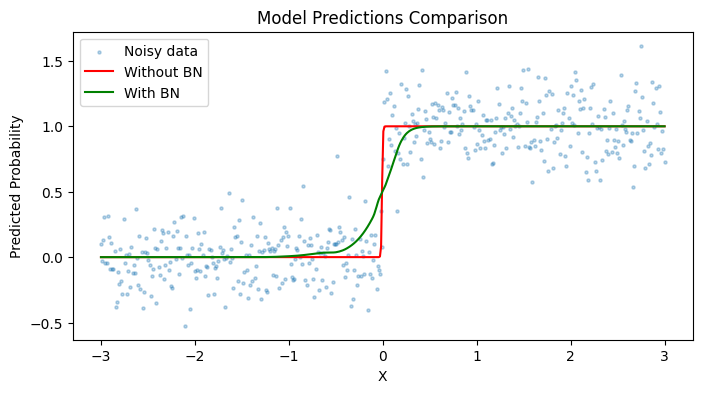

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic noisy classification data
np.random.seed(42)  # Untuk reproducibility
X = np.linspace(-3, 3, 500).reshape(-1, 1)
y = (X[:, 0] > 0).astype(np.float32).reshape(-1, 1)
y += np.random.randn(*y.shape) * 0.2  # Menambahkan noise lebih tinggi

# Plot data
plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=5, label='Noisy data')
plt.plot(X, (X > 0).astype(float), 'r-', label='True boundary')
plt.title("Synthetic Noisy Classification Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Define model without Batch Normalization
model_no_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define model with Batch Normalization
model_with_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile both models
model_no_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_with_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train both models
print("Training model WITHOUT BatchNorm...")
history_no_bn = model_no_bn.fit(X, y, epochs=100, verbose=0, validation_split=0.2)

print("\nTraining model WITH BatchNorm...")
history_with_bn = model_with_bn.fit(X, y, epochs=100, verbose=0, validation_split=0.2)

# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_no_bn.history['val_accuracy'], label='Without BN')
plt.plot(history_with_bn.history['val_accuracy'], label='With BN')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_no_bn.history['val_loss'], label='Without BN')
plt.plot(history_with_bn.history['val_loss'], label='With BN')
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Visualize predictions
plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=5, alpha=0.3, label='Noisy data')
plt.plot(X, model_no_bn.predict(X), 'r-', label='Without BN')
plt.plot(X, model_with_bn.predict(X), 'g-', label='With BN')
plt.title("Model Predictions Comparison")
plt.xlabel("X")
plt.ylabel("Predicted Probability")
plt.legend()
plt.show()